In [1]:
import umap
import numpy as np
import glob
import os
from mnist.loader import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='poster')

In [2]:
path = f'/mnt/storage/Cloud/MEGA/TrojAI/TrojAI-UMD/internal_maps/samples-1000/round1-holdout-dataset'
data = []
target = []
for f in glob.glob(f'{path}/*softmax*.npy'):
    basename = os.path.basename(f)
    data.append(np.load(f).ravel())
    target.append(1 if 'backdoor' in basename else 0)
data = np.array(data)
target = np.array(target)
print(data.shape, target.shape)
print('done')

(40, 25) (40,)
done


In [3]:
embedding = umap.UMAP().fit_transform(data, y=target)

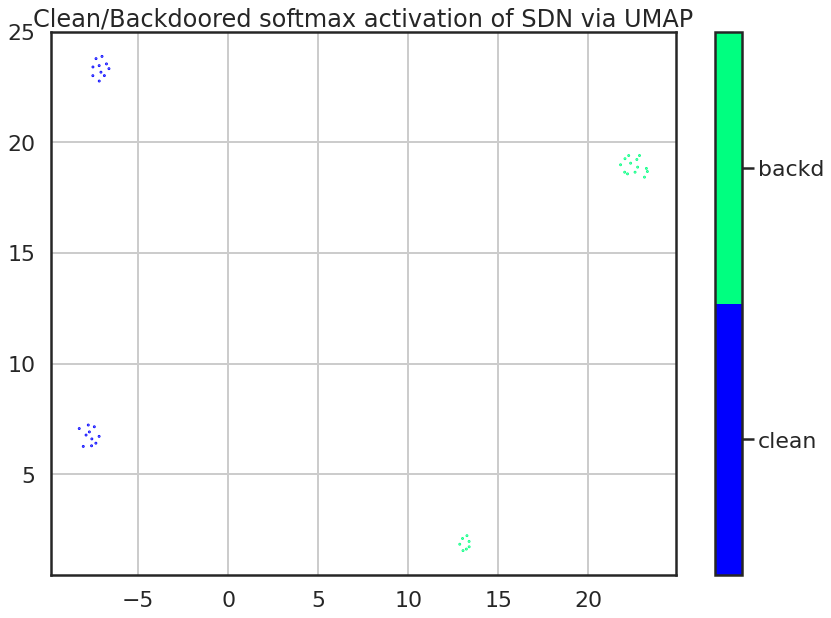

In [7]:
classes = ['clean', 'backd']
colors = ['blue', 'orange']
n_classes = len(classes)
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.75, c=target, cmap='winter', alpha=1.0)
# plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(n_classes+1)-0.5)
cbar.set_ticks(np.arange(n_classes+1))
cbar.set_ticklabels(classes)
plt.grid()
plt.title('Clean/Backdoored softmax activation of SDN via UMAP');